### PCA - Titanic

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('titanic')
df = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who']]
df.head()


,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


In [49]:
df.isna().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
embarked      2
who           0
dtype: int64

In [50]:
df.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [51]:
df.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [52]:
man_mean = df[df.who == 'man'].age.mean().round(1)
woman_mean = df[df.who =='woman'].age.mean().round(1)
print(man_mean, woman_mean)

33.2 32.0


In [53]:
df[ df.age.isna() & (df.who == 'man')]

,survived,pclass,age,sibsp,parch,fare,embarked,who
5,0,3,NaN,0,0,8.4583,Q,man
17,1,2,NaN,0,0,13.0000,S,man
26,0,3,NaN,0,0,7.2250,C,man
29,0,3,NaN,0,0,7.8958,S,man
36,1,3,NaN,0,0,7.2292,C,man
...,...,...,...,...,...,...,...,...
839,1,1,NaN,0,0,29.7000,C,man
846,0,3,NaN,8,2,69.5500,S,man
859,0,3,NaN,0,0,7.2292,C,man
868,0,3,NaN,0,0,9.5000,S,man


In [54]:
df.embarked.fillna('S', inplace=True)
df.age.fillna(df[df.who.isin(['man', 'woman'])].age.mean().round(1), inplace=True)
df.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
dtype: int64

In [55]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,S,man
1,1,1,38.0,1,0,71.2833,C,woman
2,1,3,26.0,0,0,7.9250,S,woman
3,1,1,35.0,1,0,53.1000,S,woman
4,0,3,35.0,0,0,8.0500,S,man


In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df.embarked = le.fit_transform(df.embarked)
df.who = le.fit_transform(df.who)
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.2500,2,1
1,1,1,38.0,1,0,71.2833,0,2
2,1,3,26.0,0,0,7.9250,2,2
3,1,1,35.0,1,0,53.1000,2,2
4,0,3,35.0,0,0,8.0500,2,1


- embarked : 0(C), 1(Q), 2(S)
- who :  0(child), 1(man), 2(woman)

In [57]:
X = df.iloc[:, 1:].values
target = df.survived.values

X_std = StandardScaler().fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

- 설명력, 정확도

In [59]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)

    return rfc.score(X_test, y_test)

In [60]:
for n in [2, 3, 4, 5, 6, 7]:
    pca = PCA(n_components=n)
    X_std_pca = pca.fit_transform(X_std)
    explained = sum(pca.explained_variance_ratio_)
    acc = pca_accuracy(X_std_pca, target)

    print(f'PCA{n} : 설명력 - {explained:.4f}, 정확도 - {acc:.4f}')

PCA2 : 설명력 - 0.5149, 정확도 - 0.7654
PCA3 : 설명력 - 0.6607, 정확도 - 0.7542
PCA4 : 설명력 - 0.7779, 정확도 - 0.8101
PCA5 : 설명력 - 0.8658, 정확도 - 0.7709
PCA6 : 설명력 - 0.9476, 정확도 - 0.7709
PCA7 : 설명력 - 1.0000, 정확도 - 0.7765


- 2차원 시각화

In [63]:
# 2차원으로 축소
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_std)

# 축소된 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_pca2, target, stratify=target, test_size=0.2, random_state=2023
)

rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7653631284916201

In [66]:
X_df = pd.DataFrame(X_pca2, columns=['PC1', 'PC2'])
X_df['target'] = target
X_df.head()

,PC1,PC2,target
0,-1.284530,-0.368387,0
1,2.473327,0.686903,1
2,-0.223517,-1.080239,1
3,1.557604,0.263340,1
4,-0.595073,-1.078737,0


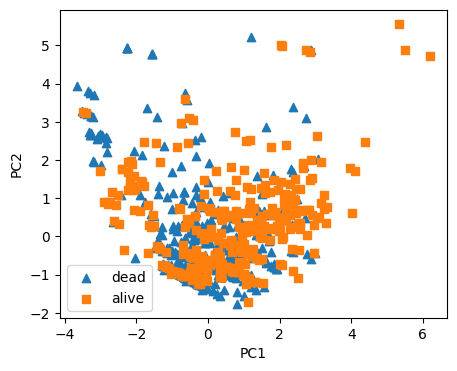

In [69]:
markers = ['^', 's']
names = ['dead', 'alive']
plt.figure(figsize=(5,4))
for i, marker in enumerate(markers):
    x_data = X_df[X_df.target == i]['PC1']
    y_data = X_df[X_df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=names[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [70]:
# 3차원으로 축소
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_std)

# 축소된 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_pca3, target, stratify=target, test_size=0.2, random_state=2023
)

rfc = RandomForestClassifier(random_state=2023)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.7541899441340782

In [72]:
X_df = pd.DataFrame(X_pca3, columns=['PC1', 'PC2', 'PC3'])
X_df['target'] = target
X_df.head()

,PC1,PC2,PC3,target
0,-1.284530,-0.368387,0.104936,0
1,2.473327,0.686903,-0.796734,1
2,-0.223517,-1.080239,0.779056,1
3,1.557604,0.263340,1.002675,1
4,-0.595073,-1.078737,0.254145,0
